**Notes to Original Images Results:**

* Models exceeding no info baseline:
* Severe over-fitting with XGBoost, but not so with LightGBM. Still not particular good performance from LightGBM.


**Notes to Removed Broken Slices Results:**

* Models exceeding no info baseline:
* Severe over-fitting with LightGBM & XGBoost. May be too complex models applied to too little data. Optimization algorithm incapable of regularizing in each experiment.

In [1]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

sns.set()
%matplotlib inline

In [2]:
def plot_train_test(results, axis):

    test = results['test_score']
    train = results['train_score']
    test_std = np.sqrt(results['test_score_variance'])
    train_std = np.sqrt(results['train_score_variance'])

    # Repeated experiments.
    x_coords = np.arange(np.size(test))

    axis.plot(
        x_coords, 
        train, 
        color='blue', marker='o', markersize=5, 
        label=f"Training score"
    )
    axis.plot(
        x_coords, 
        test, 
        color='green', linestyle='--', marker='s', 
        label=f"Validation score"
    )
    axis.fill_between(
        x_coords, 
        train - train_std, 
        train + train_std, 
        alpha=0.15, color='blue'
    )
    axis.fill_between(
        x_coords, 
        test - test_std, 
        test + test_std, 
        alpha=0.15, color='green'
    )
    return axis

In [3]:
def print_params(model, estimator_name):
    
    for var_label in list(model.filter(regex=estimator_name).columns):
        var = np.copy(model[f'{var_label}'])
        try:
            var[np.where(np.isnan(var))] = -1
        except:
            pass
        print(var_label.split('__')[1])
        print('-' * 60)
        print(Counter(var))
        print('-' * 60)
        print('\n')

In [4]:
#results = pd.read_csv(
#    './../../data_source/results/original_images/results_all_features_original_images.csv',
#    index_col=0
#)
#results = pd.read_csv(
#    './../../data_source/results/removed_broken_slices/results_all_features_removed_broken_slices.csv',
#    index_col=0
#)
#results = pd.read_csv(
#    './../../data_source/results/hassan_original_images/results_all_features_icc.csv',
#    index_col=0
#)
#results = pd.read_csv(
#    './../../data_source/results/dropped_corr/results_all_features_original_images_icc_dropped_correlated.csv',
#    index_col=0
#)
results = pd.read_csv(
    './../../data_source/results/hpv_splitting/results_all_features_hpv_group_b.csv',
    index_col=0
)

In [5]:
#list(np.unique(orig_results['experiment_id'].values))

# Dummy + Ridge 

In [6]:
selector_name = 'DummySelection' 
estimator_name = 'RidgeClassifier'
ridge = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

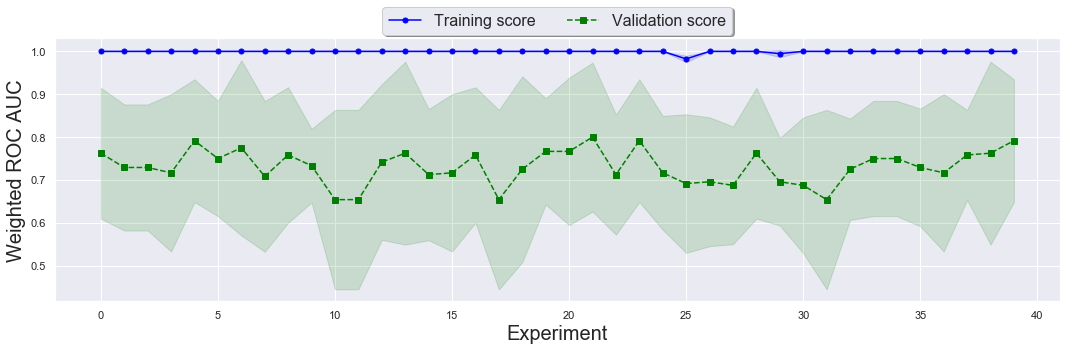

In [21]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(ridge, axis)

plt.ylabel('Weighted ROC AUC', fontsize=20)
plt.xlabel('Experiment', fontsize=20)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    fontsize=16,
    title_fontsize=18,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
plt.savefig(
    './../../figures/train_valid_curves/ridge_clf.png',
    bbox_inches='tight',
    dpi=100, 
)

In [8]:
for var_label in list(ridge.filter(regex=estimator_name).columns):
    var = np.copy(ridge[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    try:
        print('Mean:', np.mean(var))
    except:
        pass
    print('\n\n')

alpha
------------------------------------------------------------
Counter({1.0: 10, 10.94065940574999: 4, 0.17876681729628016: 3, 0.41608963896989787: 3, 0.5745754007234718: 3, 2.8573617435916034: 2, 4.768969345108441: 2, 11.796094939434733: 2, 15.1408887294897: 1, 0.2636903337587572: 1, 1.3170434998859288: 1, 2.585866759114558: 1, 0.06333162323674517: 1, 67.6752562981403: 1, 0.2158508483515033: 1, 0.3346204358984909: 1, 26.653314462895842: 1, 9.074774776154314: 1, 0.35261166272466543: 1})
------------------------------------------------------------
Mean: 5.494825866997231





# MultiSURF & XGBoost

In [9]:
selector_name = 'MultiSURFSelection' 
estimator_name = 'XGBoost'
multi_xgb = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

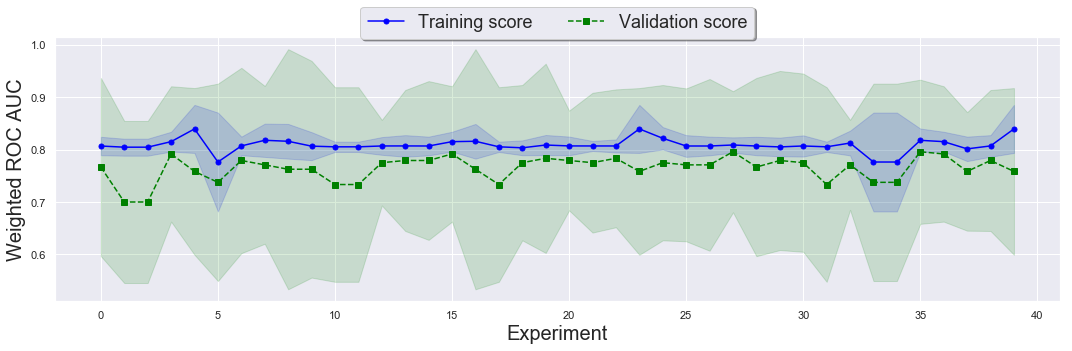

In [20]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(multi_xgb, axis)

plt.ylabel('Weighted ROC AUC', fontsize=20)
plt.xlabel('Experiment', fontsize=20)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    fontsize=18,
    title_fontsize=20,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
plt.savefig(
    './../../figures/train_valid_curves/multisurf_xgb.png',
    bbox_inches='tight',
    dpi=100, 
)

In [66]:
for var_label in list(multi_xgb.filter(regex=estimator_name).columns):
    var = np.copy(multi_xgb[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print('min', np.min(var))
    print('mean', np.mean(var))
    print('var', np.sqrt(np.var(var)))
    print('max', np.max(var))
    #print(Counter(var))
    print('-' * 60)
    print('\n\n')

learning_rate
------------------------------------------------------------
min 0.01
mean 19.046325462694227
var 16.035021929540843
max 47.642103747733536
------------------------------------------------------------



max_depth
------------------------------------------------------------
min 30.0
mean 229.625
var 160.40256972692177
max 475.0
------------------------------------------------------------



min_data_in_leaf
------------------------------------------------------------
min 2.0
mean 3.925
var 1.0096410253154338
max 5.0
------------------------------------------------------------



n_estimators
------------------------------------------------------------
min 16.0
mean 117.075
var 52.99593734429084
max 195.0
------------------------------------------------------------



reg_alpha
------------------------------------------------------------
min 4.221814697318819
mean 5.886118966133819
var 1.1810792419477776
max 7.894311174740944
-----------------------------------------------

In [67]:
print(np.min(multi_xgb.filter(regex='MultiSURFSelection__num_features')))
print(np.mean(multi_xgb.filter(regex='MultiSURFSelection__num_features')))
print(np.std(multi_xgb.filter(regex='MultiSURFSelection__num_features')))
print(np.max(multi_xgb.filter(regex='MultiSURFSelection__num_features')))

MultiSURFSelection__num_features    6.0
dtype: float64
MultiSURFSelection__num_features    26.225
dtype: float64
MultiSURFSelection__num_features    10.833945
dtype: float64
MultiSURFSelection__num_features    47.0
dtype: float64


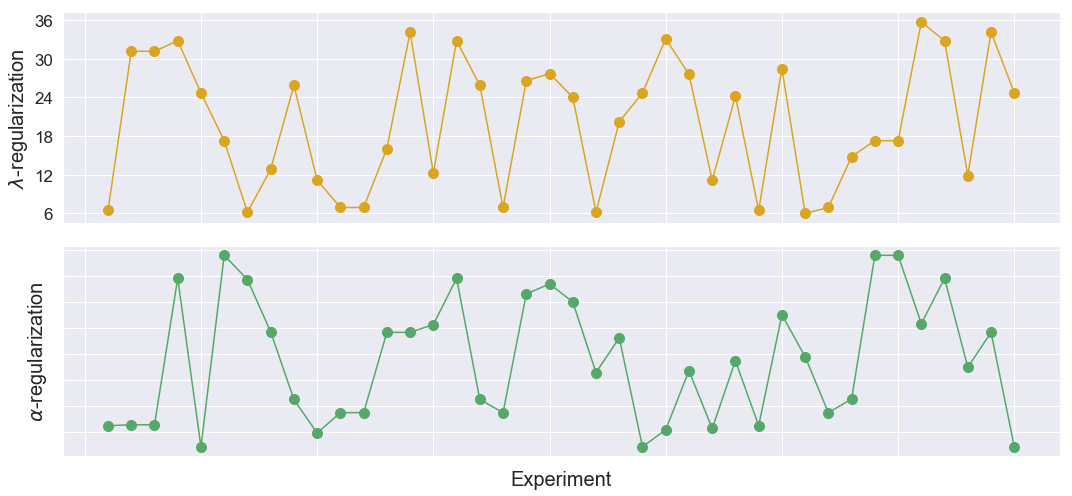

In [62]:
param1 = multi_xgb.filter(regex='XGBoost__reg_lambda').values
param2 = multi_xgb.filter(regex='XGBoost__reg_alpha').values
x_coords = np.arange(param1.size) + 1

fig, axes = plt.subplots(nrows=2, figsize=(15, 7), sharex=True)
axes[0].plot(x_coords, param1, c='goldenrod', marker='o', linestyle='-', markersize=10)
axes[1].plot(x_coords, param2, 'go-', markersize=10)

params = [param1, param2]
titles = [r'$\lambda$-regularization', r'$\alpha$-regularization']
for num, axis in enumerate(axes.ravel()):
    axis.set_ylabel(titles[num], fontsize=20)
    axis.set_yticklabels(
        #np.arange(np.min(params[num]), np.max(params[num]), 6, dtype=int), 
        np.arange(np.min(params[num]), np.max(params[num]), 6, dtype=int), 
        fontsize=17
    )
    axis.set_xticklabels([])
axis.set_xlabel('Experiment', fontsize=20)
    
plt.tight_layout()
plt.savefig(
    './../../figures/parameters/multisurf_xgb_reg_params.png',
    bbox_inches='tight',
    dpi=100, 
)

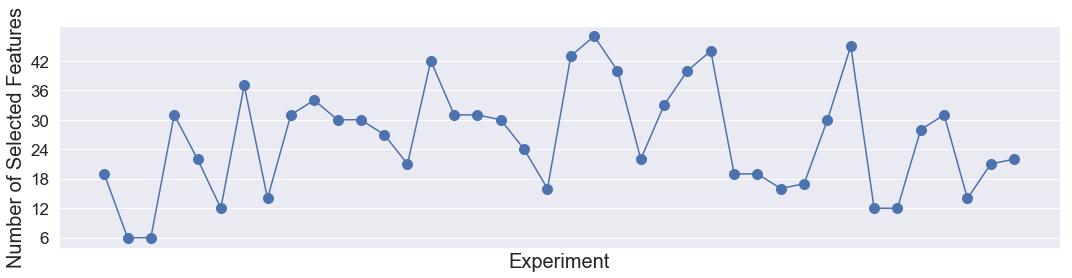

In [63]:
param = multi_xgb.filter(regex='MultiSURFSelection__num_features').values
x_coords = np.arange(param.size) + 1

plt.figure(figsize=(15, 4))
plt.plot(x_coords, param, 'bo-', markersize=10)
plt.ylabel('Number of Selected Features', fontsize=20)
plt.xlabel('Experiment', fontsize=20)

plt.xticks([])
plt.yticks(
    np.arange(np.min(param), np.max(param), 6, dtype=int), 
    np.arange(np.min(param), np.max(param), 6, dtype=int), 
    fontsize=17
)
plt.tight_layout()

plt.savefig(
    './../../figures/parameters/multisurf_xgb_num_set_features.png',
    bbox_inches='tight',
    dpi=100, 
)

# Fisher Score & SVC

In [6]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'SVCEstimator'
fisher_svc = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

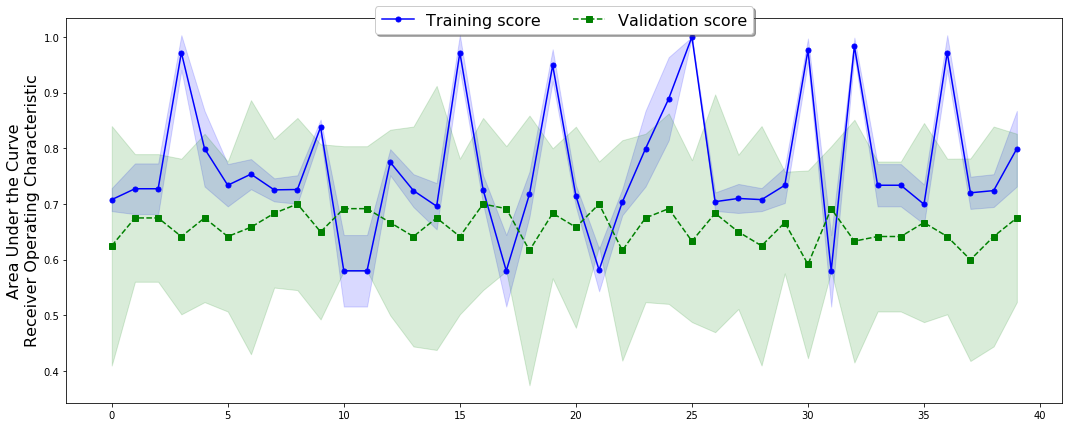

In [7]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_svc, axis)

plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

# Fisher Score & DTree

In [8]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'DTreeEstimator'
fisher_dtree = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

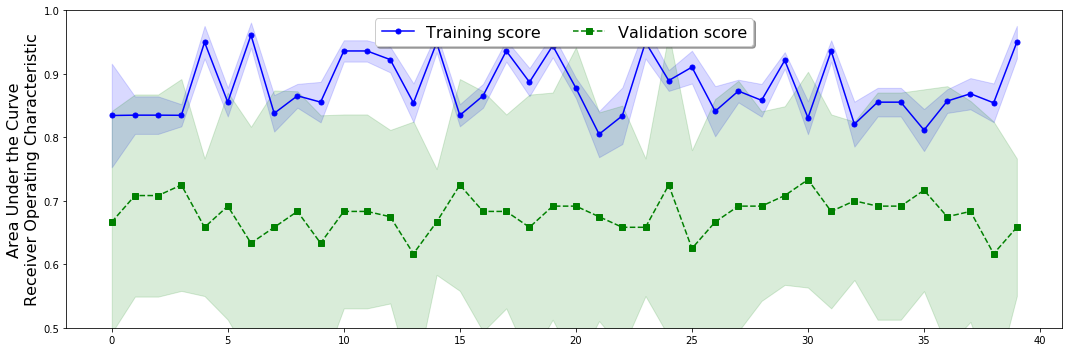

In [12]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(fisher_dtree, axis)

plt.ylim([0.5, 1.0])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.0),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
#plt.savefig(
#    './../../figures/best_models/icc_dropped_train_val_fisher_lgbm.png',
#    bbox_inches='tight',
#    transparent=True,
#    dpi=100, 
#)

In [14]:
for var_label in list(fisher_dtree.filter(regex=estimator_name).columns):
    var = np.copy(fisher_dtree[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'gini': 30, 'entropy': 10})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({'10': 15, '5': 13, 'none': 7, '20': 5})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({'auto': 14, 'sqrt': 11, 'log2': 10, 'none': 5})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({5.0: 16, 4.0: 9, 2.0: 8, 3.0: 7})
------------------------------------------------------------




# MultiSurf & SVC

In [17]:
selector_name = 'MultiSURFSelection' 
estimator_name = 'SVCEstimator'
surf_svc = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

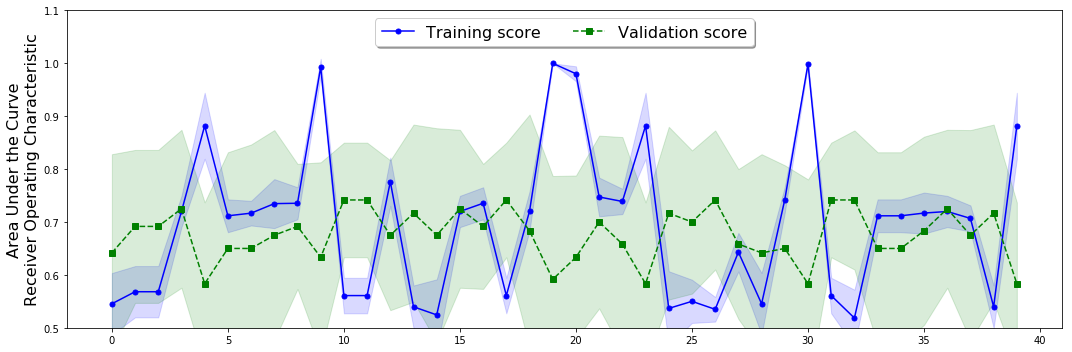

In [19]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(surf_svc, axis)

plt.ylim([0.5, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.0),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
#plt.savefig(
#    './../../figures/best_models/icc_dropped_train_val_fisher_lgbm.png',
#    bbox_inches='tight',
#    transparent=True,
#    dpi=100, 
#)

In [20]:
for var_label in list(surf_svc.filter(regex=estimator_name).columns):
    var = np.copy(surf_svc[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

C
------------------------------------------------------------
Counter({14.309795805249195: 4, 91.4609710804022: 3, 78.7485426073975: 3, 28.19128920597923: 3, 11.694870467951539: 2, 83.70252161090767: 2, 15.83477143533758: 2, 35.09551901316215: 2, 20.191513547202607: 1, 83.93634912582108: 1, 87.34965491343027: 1, 1.0: 1, 99.10691970529585: 1, 94.16743241601999: 1, 89.42466827078289: 1, 6.34444547508334: 1, 92.10149478064808: 1, 80.35337618386342: 1, 40.36380830048832: 1, 19.460390345985815: 1, 78.36575810884678: 1, 46.034948749447366: 1, 11.330885816436195: 1, 71.52774495244745: 1, 67.69803490233093: 1, 31.739885106492725: 1, 41.96378684074996: 1})
------------------------------------------------------------


kernel
------------------------------------------------------------
Counter({'sigmoid': 16, 'linear': 16, 'rbf': 5, 'poly': 3})
------------------------------------------------------------


shrinking
------------------------------------------------------------
Counter({True: 25,

# Fisher Score & LightGBM

In [15]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'LightGBM'
fisher_gbm = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

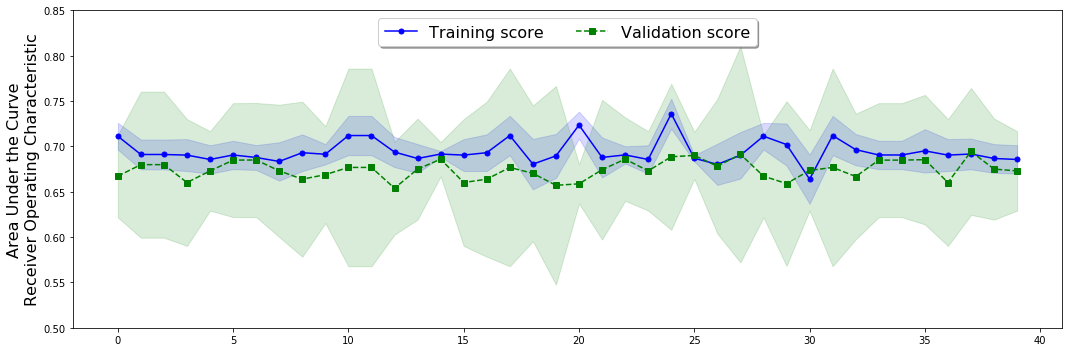

In [16]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 5), sharex=True)

plot_train_test(fisher_gbm, axis)

plt.ylim([0.5, 0.85])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.0),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
plt.savefig(
    './../../figures/best_models/icc_dropped_train_val_fisher_lgbm.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [10]:
for var_label in list(fisher_gbm.filter(regex=estimator_name).columns):
    var = np.copy(fisher_gbm[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

learning_rate
------------------------------------------------------------
Counter({0.5074267694955438: 4, 17.5804511077093: 3, 24.30761210108468: 3, 2.533656723406609: 3, 0.023729632266652912: 2, 8.209479248072562: 2, 3.821348558346045: 2, 1.6444318743864947: 2, 0.4914516996823184: 1, 2.343369810862664: 1, 0.3900373557732181: 1, 35.05183315873527: 1, 7.642017472703202: 1, 1.9347951511855224: 1, 0.3836750453971492: 1, 26.63115397122971: 1, 1.872022328449664: 1, 9.708301253116458: 1, 0.817027478880211: 1, 3.7881223905340766: 1, 0.4682981359720715: 1, 17.037001099633056: 1, 3.496260360375308: 1, 12.940469267966373: 1, 5.787509026805631: 1, 14.414506836319996: 1, 32.28183838080466: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({44.0: 4, 11.0: 3, 166.0: 3, 16.0: 3, 133.0: 2, 106.0: 2, 402.0: 2, 51.0: 2, 441.0: 1, 216.0: 1, 5.0: 1, 386.0: 1, 59.0: 1, 27.0: 1, 198.0: 1, 360.0: 1, 319.0: 1, 349

Text(0.5, 0, 'Experimet')

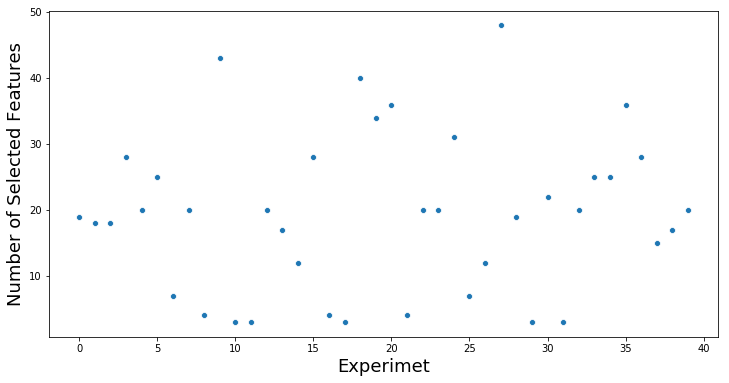

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    np.arange(fisher_gbm['FisherScoreSelection__num_features'].size),
    fisher_gbm['FisherScoreSelection__num_features']
)
plt.ylabel('Number of Selected Features', fontsize=18)
plt.xlabel('Experimet', fontsize=18)

# Wilcoxon & LightGBM

In [12]:
selector_name = 'WilcoxonSelection' 
estimator_name = 'LightGBM'
wlcx_gbm = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

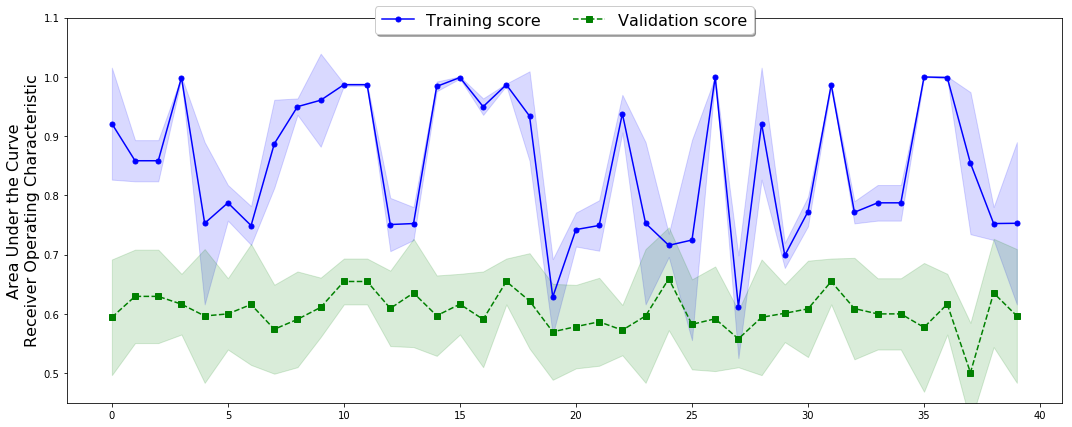

In [13]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(wlcx_gbm, axis)

plt.ylim([0.45, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [14]:
for var_label in list(wlcx_gbm.filter(regex=estimator_name).columns):
    var = np.copy(wlcx_gbm[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

learning_rate
------------------------------------------------------------
Counter({2.2483786472735883: 4, 0.01: 3, 37.952258703048685: 3, 0.9809058489259548: 3, 15.694894754670113: 2, 2.1412616757406338: 2, 5.477960110857476: 2, 3.6211497064777305: 2, 2.6523773737149248: 1, 6.922849142275622: 1, 16.46018307357133: 1, 0.2681991328573851: 1, 5.640493491722463: 1, 18.097838708580333: 1, 37.53491085953189: 1, 0.2290109510054117: 1, 0.4733272616900364: 1, 5.8121408320291605: 1, 7.493891107580135: 1, 22.744670916090627: 1, 4.306734021324479: 1, 49.30176252992502: 1, 0.4393214912173364: 1, 5.397733494720272: 1, 5.853630577629447: 1, 0.3128023862539131: 1, 49.35344236138239: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({100.0: 4, 74.0: 4, 290.0: 3, 56.0: 3, 104.0: 2, 314.0: 2, 393.0: 2, 482.0: 2, 5.0: 1, 390.0: 1, 215.0: 1, 49.0: 1, 13.0: 1, 111.0: 1, 43.0: 1, 428.0: 1, 29.0: 1, 225.0: 1, 496.

# Fisher score & XGBoost 

In [15]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'XGBoost'
fisher_boost_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

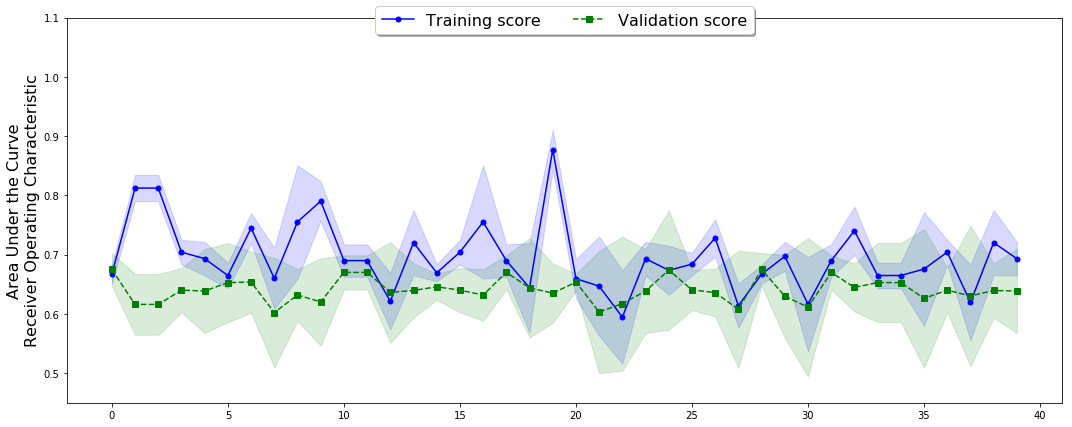

In [16]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_boost_results, axis)

plt.ylim([0.45, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [17]:
print_params(fisher_boost_results, estimator_name)

learning_rate
------------------------------------------------------------
Counter({17.847436227042927: 4, 29.53279495958317: 3, 11.278428584698839: 3, 49.87330901788455: 3, 11.543312483093779: 2, 0.01: 2, 46.880468738495: 2, 46.13861602667407: 2, 3.3472940765248085: 1, 45.964644760430346: 1, 9.153946854018194: 1, 35.65021786619246: 1, 41.207091299248226: 1, 49.6485329222351: 1, 1.0205442474579522: 1, 43.766445147442134: 1, 21.801358142937566: 1, 28.503039177593273: 1, 39.462690268883094: 1, 1.496102099046039: 1, 20.344159544241847: 1, 39.740989294386: 1, 31.26836171509408: 1, 40.504989215449314: 1, 26.626487447502107: 1, 35.57857793710044: 1, 28.67782498044182: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({135.0: 4, 346.0: 3, 166.0: 3, 262.0: 3, 211.0: 2, 97.0: 2, 444.0: 2, 90.0: 2, 164.0: 1, 5.0: 1, 242.0: 1, 24.0: 1, 483.0: 1, 38.0: 1, 189.0: 1, 230.0: 1, 9.0: 1, 402.0: 1, 141.0: 1, 

# Chi Square & Light GBM

In [18]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'LightGBM'
chi2_gbm_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

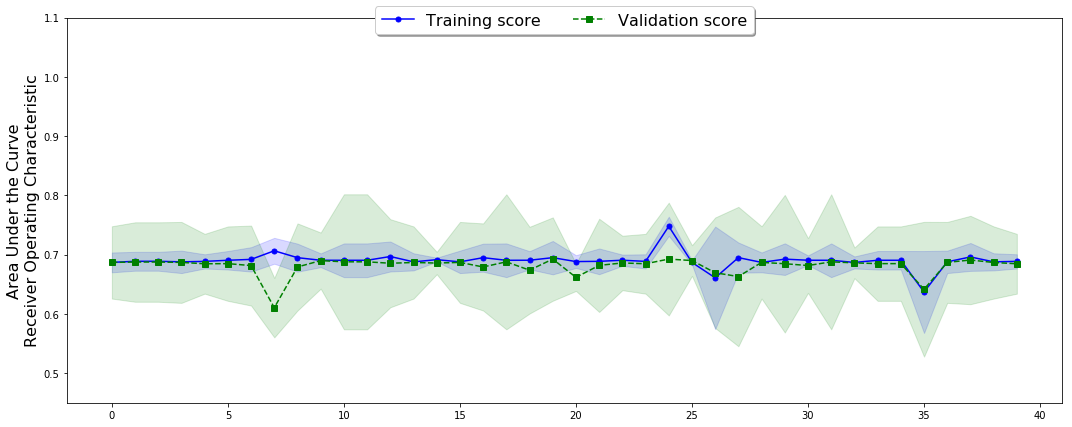

In [19]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(chi2_gbm_results, axis)

plt.ylim([0.45, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [20]:
print_params(chi2_gbm_results, estimator_name)

learning_rate
------------------------------------------------------------
Counter({0.2569583118537865: 4, 17.5804511077093: 3, 6.480988409719437: 3, 0.2650930472150085: 3, 2.5260578558589706: 2, 10.759048497134405: 2, 0.98966687510297: 2, 2.2410764784185218: 2, 10.086347408696929: 1, 1.4969498379427666: 1, 1.2970272500595643: 1, 1.761949503492143: 1, 0.4049239273953838: 1, 0.888535121307632: 1, 1.2283631648121225: 1, 19.71679248491437: 1, 3.633618404577043: 1, 28.42781752564312: 1, 2.586971498132341: 1, 4.670705177383128: 1, 46.49879709742378: 1, 1.402088043136842: 1, 1.5892480082761735: 1, 0.23397898716637386: 1, 1.0584102514263816: 1, 44.174727379343615: 1, 23.801047367114574: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({81.0: 4, 5.0: 3, 11.0: 3, 325.0: 3, 56.0: 3, 302.0: 2, 84.0: 2, 448.0: 2, 334.0: 1, 36.0: 1, 17.0: 1, 155.0: 1, 244.0: 1, 232.0: 1, 304.0: 1, 97.0: 1, 441.0: 1, 269